## SMS Spam Classifier: Multinomial Naive Bayes

The notebook is divided into the following sections:
1. Importing and preprocessing data
2. Building the model: Multinomial Naive Bayes
    - Model building 
    - Model evaluation

### 1. Importing and Preprocessing Data

In [19]:
import pandas as pd

path = 'Module-3_Naive Bayes/2_Naive Bayes for Text Classification/Example-2_SMS_Spam-Ham/SMSSpamCollection'
docs = pd.read_table(path, header=None, names = ['Class','sms'])
docs


,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [22]:
ham_spam = docs.Class.value_counts()
ham_spam

Class
ham     4825
spam     747
Name: count, dtype: int64

In [23]:
docs['label'] = docs.Class.map({'ham':0, 'spam':1})
docs

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [24]:
docs.drop(columns='Class', inplace=True)
docs

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [34]:
spam_rate = ham_spam.iloc[1]/(ham_spam.iloc[0]+ham_spam.iloc[1])*100
print('Spam Rate is : {0}%'.format(round(spam_rate),2))

Spam Rate is : 13%


In [35]:
docs

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [36]:
X = docs.sms
y = docs.label
print(X)
print(y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: sms, Length: 5572, dtype: object
0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [40]:
X_train.head()

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: sms, dtype: object

In [42]:
y_train.head()

710     1
3740    0
2711    1
3155    1
3748    0
Name: label, dtype: int64

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english')

In [44]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [48]:
len(vect.vocabulary_.keys())

7204

In [50]:
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)
print(X_train_transformed)

  (0, 50)	1
  (0, 264)	1
  (0, 509)	1
  (0, 1527)	1
  (0, 1971)	1
  (0, 2780)	2
  (0, 3089)	1
  (0, 3763)	1
  (0, 3852)	1
  (0, 4248)	1
  (0, 4624)	1
  (0, 4626)	1
  (0, 4818)	1
  (0, 4822)	1
  (0, 5027)	1
  (0, 5310)	1
  (0, 6673)	1
  (1, 2169)	1
  (1, 6028)	1
  (1, 6545)	1
  (2, 98)	1
  (2, 563)	1
  (2, 1867)	1
  (2, 2436)	1
  (2, 3180)	1
  :	:
  (4176, 3879)	1
  (4176, 4417)	1
  (4176, 5229)	1
  (4176, 6191)	1
  (4176, 7134)	1
  (4177, 254)	1
  (4177, 307)	1
  (4177, 358)	1
  (4177, 831)	1
  (4177, 2046)	1
  (4177, 2704)	1
  (4177, 3585)	1
  (4177, 3623)	1
  (4177, 4130)	1
  (4177, 4315)	1
  (4177, 4771)	1
  (4177, 5234)	1
  (4177, 5321)	1
  (4177, 5487)	1
  (4177, 5620)	1
  (4177, 6321)	1
  (4177, 6374)	1
  (4177, 6453)	1
  (4178, 1643)	1
  (4178, 5817)	1


In [51]:
X_train_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### 2. Building and Evaluating the Model

In [97]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

mnb = MultinomialNB()
bnb = BernoulliNB()

mnb.fit(X_train_transformed,y_train)
bnb.fit(X_train_transformed,y_train)

y_pred_class_mnb = mnb.predict(X_test_transformed)
y_pred_class_bnb = bnb.predict(X_test_transformed)

y_pred_prob_mnb = mnb.predict_proba(X_test_transformed)
y_pred_prob_bnb = bnb.predict_proba(X_test_transformed)



In [98]:
print('Predictions of Multinomial NB : ', y_pred_class_mnb)
print('Predictions of Bernoulli NB : ', y_pred_class_bnb)

Predictions of Multinomial NB :  [0 0 0 ... 0 1 0]
Predictions of Bernoulli NB :  [0 0 0 ... 0 1 0]


In [102]:
print('Prediction Prob of Multinomial NB : \n', y_pred_prob_mnb)
print('\n\nPredictions Prob of Bernoulli NB \n: ', y_pred_prob_bnb)

Prediction Prob of Multinomial NB : 
 [[9.95239557e-01 4.76044325e-03]
 [9.99852357e-01 1.47642544e-04]
 [9.27878579e-01 7.21214213e-02]
 ...
 [9.99999671e-01 3.28799076e-07]
 [3.72703622e-09 9.99999996e-01]
 [9.99999985e-01 1.46852511e-08]]


Predictions Prob of Bernoulli NB 
:  [[1.00000000e+00 1.54647985e-10]
 [1.00000000e+00 1.69177313e-10]
 [9.99999997e-01 2.52488636e-09]
 ...
 [9.99994219e-01 5.78141360e-06]
 [3.64570741e-06 9.99996354e-01]
 [1.00000000e+00 2.90374743e-12]]


### Model Evaluation

In [110]:
from sklearn import metrics

acc_mnb = metrics.accuracy_score(y_test,y_pred_class_mnb)
prec_mnb = metrics.precision_score(y_test, y_pred_class_mnb)

acc_bnb = metrics.accuracy_score(y_test,y_pred_class_bnb)
prec_bnb = metrics.precision_score(y_test, y_pred_class_bnb)


cnf_mnb = metrics.confusion_matrix(y_test,y_pred_class_mnb)
print('Confusion Matrix for MultinomialNB: \n',cnf_mnb)

cnf_bnb = metrics.confusion_matrix(y_test,y_pred_class_bnb)
print('Confusion Matrix for BernoulliNB: \n',cnf_bnb)


print("\nAccuracy for MultinomialNB: {0}%".format(round(acc_mnb*100,2)))
print("Precision for MultinomialNB: {0}%".format(round(prec_mnb*100,2)))

print("\nAccuracy for BernoulliNB: {0}%".format(round(acc_bnb*100,2)))
print("Precision for BernoulliNB: {0}%".format(round(prec_bnb*100,2)))


Confusion Matrix for MultinomialNB: 
 [[1201    7]
 [  10  175]]
Confusion Matrix for BernoulliNB: 
 [[1207    1]
 [  31  154]]

Accuracy for MultinomialNB: 98.78%
Precision for MultinomialNB: 96.15%

Accuracy for BernoulliNB: 97.7%
Precision for BernoulliNB: 99.35%


In [152]:
def Evaluation_Metrics(y_test,y_pred_class):


    from sklearn import metrics

    acc = metrics.accuracy_score(y_test,y_pred_class)
    prec_met = metrics.precision_score(y_test, y_pred_class)

    cnf_matrix = metrics.confusion_matrix(y_test,y_pred_class)
    print('Confusion Matrix : \n',cnf_matrix)

    print("\nAccuracy : {0}%".format(round(acc*100,5)))
    print("Precision_Metric : {0}%".format(round(prec_met*100,5)))

    TN = cnf_matrix[0, 0]
    FP = cnf_matrix[0, 1]
    FN = cnf_matrix[1, 0]
    TP = cnf_matrix[1, 1]

    sensitivity = TP/(TP + FN)*100
    specificity = TN/(TN + FP)*100
    precision_calc = TP/(TP + FP)*100

    print("Precision_Calculated : {0}%".format(round(precision_calc,5)))
    print("Sensitivity : {0}%".format(round(sensitivity,5)))
    print("Specificity : {0}%".format(round(specificity,5)))
    


In [153]:
print("For MultinomialNB :")
Evaluation_Metrics(y_test,y_pred_class_mnb)
print("\n\nFor BernoulliNB :")
Evaluation_Metrics(y_test,y_pred_class_bnb)

For MultinomialNB :
Confusion Matrix : 
 [[1201    7]
 [  10  175]]

Accuracy : 98.77961%
Precision_Metric : 96.15385%
Precision_Calculated : 96.15385%
Sensitivity : 94.59459%
Specificity : 99.42053%


For BernoulliNB :
Confusion Matrix : 
 [[1207    1]
 [  31  154]]

Accuracy : 97.7028%
Precision_Metric : 99.35484%
Precision_Calculated : 99.35484%
Sensitivity : 83.24324%
Specificity : 99.91722%


In [180]:
def ROC_plot(y_test,y_pred_prob):
    from sklearn.metrics import roc_curve,auc
    import matplotlib.pyplot as plt

    FPR, TPR, th = roc_curve(y_test, y_pred_prob[:,1])
    roc_auc = auc(FPR,TPR)
    
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(FPR,TPR,)
    plt.text(0.6, 0.2, 'ROC AUC = {:.6f}'.format(roc_auc), fontsize=10)
    plt.show()


For MultinomialNB :


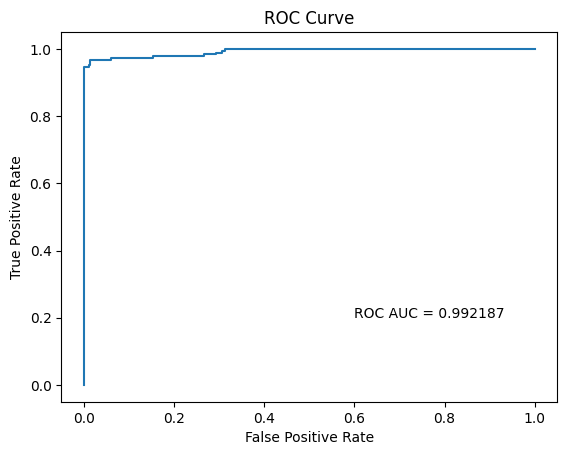


For BernoulliNB :


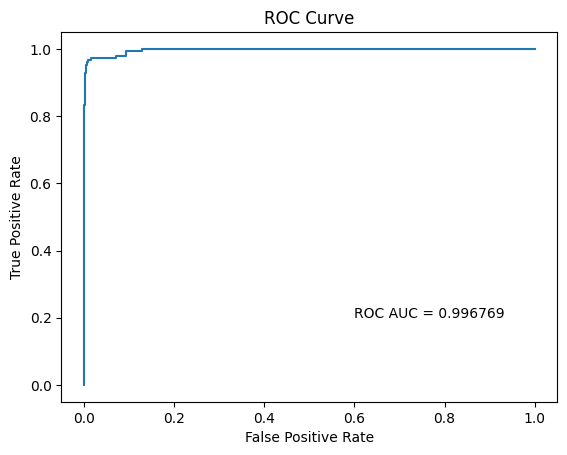

In [181]:
print("For MultinomialNB :")
ROC_plot(y_test, y_pred_prob_mnb)
print("\nFor BernoulliNB :")
ROC_plot(y_test, y_pred_prob_bnb)